Herman Steurs

Dataset: https://www.kaggle.com/datasets/krupadharamshi/fuelconsumption

Lineaire regressie 

Oefening: lineaire regressie uitvoeren op de dataset.
Importeren modules
Data bekijken met Sweetviz
Data bewerken

LabelEncoder toegepast om de score van de Kaggle gebruiker te verkrijgen
Correlatie van de kolommen bekeken
Skewness van de target variabele verbetert
StandardScaler toegepast
Feature enginering 
Lasso
Ridge
Outliers bekijken 


## Inlezen van de data

In [87]:
# Importeren van modules:

import pandas as pd
import numpy as np

# Inlezen van de dataset

auto = pd.read_csv("data/FuelConsumption_dataset.csv")

## Data en structuur bekijken 

In [88]:
# Lege cellen en dataypes bekijken
auto.info()

# Samenvattingen van de numerische kolommen (minimum en maximum waarden,... )
auto.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [89]:
# Overzicht van de eerste 5 rijen. ()is standaard 5 rijen
auto.head()


,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [90]:
# Inlezen data in Sweetviz

import sweetviz as sv

auto = pd.read_csv("data/FuelConsumption_dataset.csv")

# hack voor bug in de uitvoering
if not hasattr(np, 'VisibleDeprecationWarning'):
     np.VisibleDeprecationWarning = DeprecationWarning

report = sv.analyze(auto)

# Output het rapport als een HTML-bestand, dit opent ook automatisch in je webbrowser
report.show_html('Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Data cleaning

In [91]:
# Print de kolomnamen 

print(auto.columns)

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')


In [92]:
# Aanpassen van de kolomnaam 'COEMISSIONS ' naar 'COEMISSIONS'

auto.rename(columns={'COEMISSIONS ': 'COEMISSIONS'}, inplace=True)

# Verwijderen van kolom 'Year' - overbodige kolom

auto.drop('Year', axis=1, inplace=True)  

# Print de kolomnamen 

print(auto.columns)

Index(['MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS'],
      dtype='object')


## Reproductie resultaat Kaggle

Kaggle user heeft alle categorische waarden omgezet in numerische waarden en een lineaire regressie toegepast en toont een modelscore van 98,57%

In [93]:

auto_num = auto.copy()

# Importeer LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Maak een LabelEncoder aan
le = LabelEncoder()

# Selecteer de categorische kolommen
obj_cols = auto_num.select_dtypes('object').columns

# Pas LabelEncoder toe op elke categorische kolom
for col in obj_cols:
    auto_num[col] = le.fit_transform(auto_num[col])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Features selecteren 
X = auto_num.drop(['COEMISSIONS'],axis=1)
y = auto_num['COEMISSIONS']

# Data splitsen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model trainen
model = LinearRegression()
model.fit(X_train, y_train)

# Voorspellingen
y_pred = model.predict(X_test)

# Printen score
print(f'Model score is {model.score(X_test, y_test)*100:.2f}%' " vs 98,57% in de kaggle notebook." )

Model score is 98.57% vs 98,57% in de kaggle notebook.


Model scores Kaggle methode

In [94]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Train score: {train_score*100:.2f}%')
print(f'Test score: {test_score*100:.2f}%')

Train score: 96.60%
Test score: 98.57%


In [95]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=6, scoring='r2')
print(f'Kruisvalidatie scores: {scores}')
print(f'Gemiddelde R²-score: {scores.mean()*100:.2f}%')

Kruisvalidatie scores: [0.9738215  0.90612424 0.98488673 0.98251414 0.94327516 0.92774743]
Gemiddelde R²-score: 95.31%


## Model verbeteren

### Skewness target variabele verbeteren

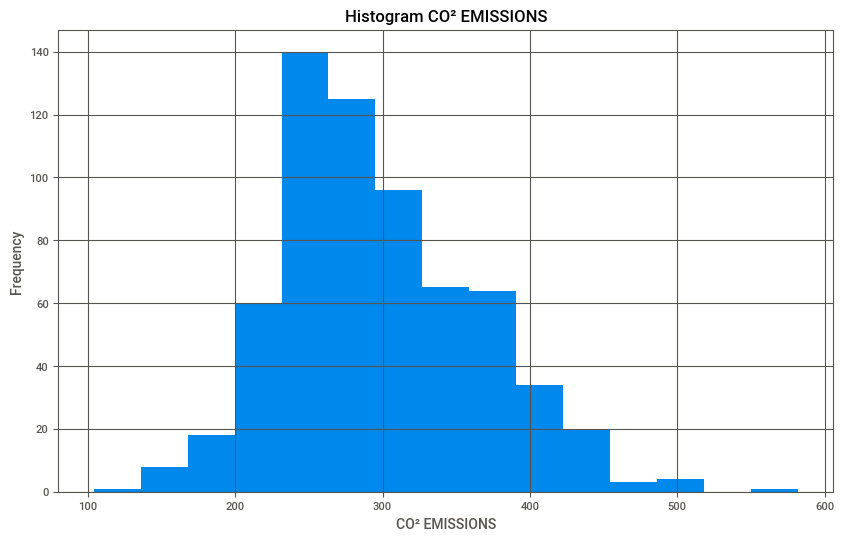

In [96]:
import matplotlib.pyplot as plt

auto_num['COEMISSIONS'].hist(bins = 15, figsize = (10, 6))
plt.xlabel('CO² EMISSIONS')
plt.ylabel('Frequency')
plt.title('Histogram CO² EMISSIONS')
plt.grid(True)
plt.show()

In [97]:
from scipy.stats import boxcox,skew

# Pas box-cox transformatie toe op de categorische kolommen
auto_num['COEMISSIONS_boxcox'], _ = boxcox(auto_num['COEMISSIONS'] + 1)  # +1 om nulwaarden te vermijden

# Bereken skewness na box-cox transformatie
skewness_boxcox = skew(auto_num['COEMISSIONS_boxcox'])
print(f'Skewness na Box-Cox transformatie: {skewness_boxcox}')

Skewness na Box-Cox transformatie: 0.005227637946758231


In [98]:
# Verwijderen van de 'COEMISSIONS' kolom 

auto_num.drop('COEMISSIONS', axis=1, inplace=True) 

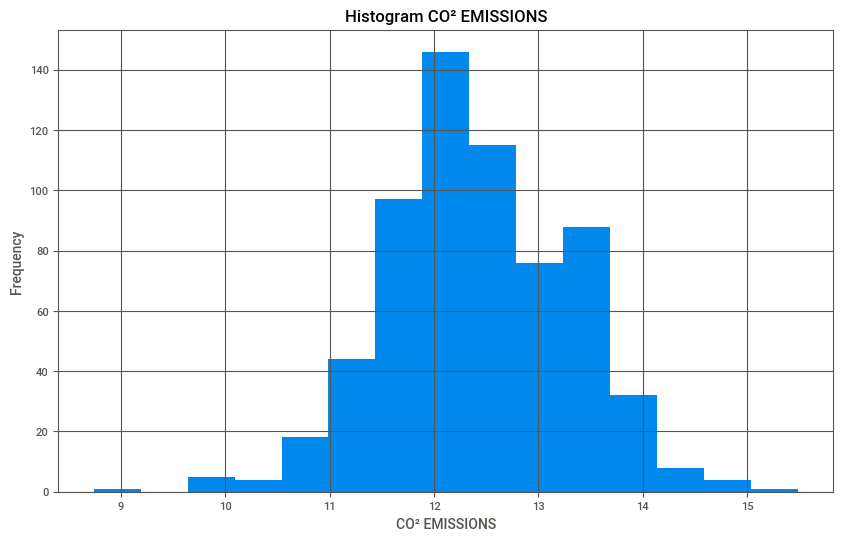

In [99]:
# nieuw histogram na box-cox transformatie
# 
auto_num['COEMISSIONS_boxcox'].hist(bins = 15, figsize = (10, 6))
plt.xlabel('CO² EMISSIONS')
plt.ylabel('Frequency')
plt.title('Histogram CO² EMISSIONS')
plt.grid(True)
plt.show()

## Correlatie van numerische variablelen

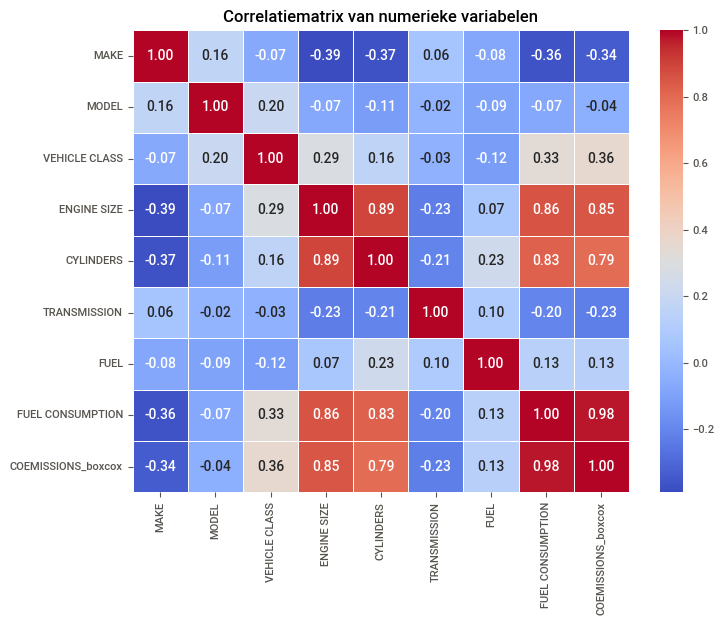

In [100]:
import seaborn as sns

# Correlatie berekenen van de numerische kolommen

correlatie_matrix =auto_num.corr()

# plot maken van de matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlatie_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.7)
plt.title("Correlatiematrix van numerieke variabelen")
plt.show()

## lineaire regressie met verbeterde skewness van de target variabele

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = auto_num.drop(['COEMISSIONS_boxcox'],axis=1)
y = auto_num['COEMISSIONS_boxcox']

# Data splitsen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model trainen
model = LinearRegression()
model.fit(X_train, y_train)

# Voorspellingen
y_pred = model.predict(X_test)


print(f'Model score is {model.score(X_test, y_test)*100:.2f}%' " vs 98,57% in de kaggle notebook." )


train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)


Model score is 95.76% vs 98,57% in de kaggle notebook.


## StandardScaler toepassen op de features

In [102]:
# StandardScaler wordt toegepast op alle kolommen in X  

from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


 # Features selecteren (enkel numerieke) 
X = auto_num.drop(['COEMISSIONS_boxcox'],axis=1)
y = auto_num['COEMISSIONS_boxcox']

# Data splitsen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline aanmaken
pipeline = Pipeline([
        ('scaler', StandardScaler()),      
        ('model', LinearRegression())       
    ])

# Model trainen
pipeline.fit(X_train, y_train)

# Voorspellingen
y_pred = pipeline.predict(X_test)

# model score berekenen
model_score = pipeline.score(X_test, y_test)

# Cross-validatie uitvoeren
cv_scores = cross_val_score(pipeline, X, y, cv=6, scoring='r2')  # CV score is het hoogst bij 6

# Resultaten weergeven (gemiddelde R²-score)
gem_cv_score = cv_scores.mean()

# Model score en cross-validatie scores weergeven
print(f'Model score: {model_score*100:.2f}%')

if model_score > 0.9857: 
    # Als een van de scores groter is dan 98,57, print het verschil
    verbetering = model_score - 0.9857
    print(f'Een verbetering van {verbetering*100:.4f}')
else:
    print('Geen verbetering, zoek verder')
    
print(f'Model score uit Cross-Validatie: {gem_cv_score*100:.2f}%')



Model score: 95.76%
Geen verbetering, zoek verder
Model score uit Cross-Validatie: 93.73%


## Minder features? Features met een negatieve correlatie eruit halen

In [103]:
X = auto_num.drop(['MAKE', 'MODEL','TRANSMISSION','COEMISSIONS_boxcox'],axis=1)
y = auto_num['COEMISSIONS_boxcox']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
        ('scaler', StandardScaler()),       
        ('model', LinearRegression())       
    ])

# Model trainen
pipeline.fit(X_train, y_train)

# Voorspellingen
y_pred = pipeline.predict(X_test)

# model score berekenen
model_score = pipeline.score(X_test, y_test)

# Cross-validatie uitvoeren
cv_scores = cross_val_score(pipeline, X, y, cv=6, scoring='r2')  # score is het hoogst bij 6

# Resultaten weergeven (gemiddelde R²-score)
gem_cv_score = cv_scores.mean()

# Model score en cross-validatie scores weergeven
print(f'Model score: {model_score*100:.2f}%')


if model_score >= 0.9857:
    # Als een van de scores groter is dan 98,57, print het verschil
    improvement = model_score - 0.9857
    print(f'Een verbetering van {improvement:.2f}')
else:
    print('Geen verbetering, zoek verder')
    
print(f'Model score uit Cross-Validatie: {gem_cv_score*100:.2f}%')





Model score: 95.42%
Geen verbetering, zoek verder
Model score uit Cross-Validatie: 94.02%


### Features samenvoegen?  

In [104]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Correlatie tussen aantal cylinders en motorinhoud
correlation = auto_num[['CYLINDERS', 'ENGINE SIZE']].corr()

print(correlation)


# VIF berekenen 
X = auto_num[['CYLINDERS', 'ENGINE SIZE']]
X = sm.add_constant(X)  # Intercept toevoegen

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


auto_merge = auto_num.copy()
auto_merge['PowerFactor'] = auto_merge['CYLINDERS'] * auto_merge['ENGINE SIZE'] 

auto_merge.drop(columns=['CYLINDERS', 'ENGINE SIZE'], inplace=True)
auto_merge

# Variance Inflation Factor < 5 dus onwaarschijnlijk dat er een invloed is.


             CYLINDERS  ENGINE SIZE
CYLINDERS     1.000000     0.893819
ENGINE SIZE   0.893819     1.000000
       Feature        VIF
0        const  15.225907
1    CYLINDERS   4.972942
2  ENGINE SIZE   4.972942


,MAKE,MODEL,VEHICLE CLASS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS_boxcox,PowerFactor
0,0,0,0,1,3,10.5,11.253426,6.4
1,0,0,0,6,3,9.8,11.057877,6.4
2,0,1,2,4,4,13.7,12.043417,19.2
3,0,2,2,1,4,15.0,12.556440,21.0
4,0,164,9,1,3,11.4,11.491795,7.2
...,...,...,...,...,...,...,...,...
634,35,303,7,1,4,14.4,12.376774,12.0
635,35,304,7,1,4,13.6,12.176352,12.0
636,35,305,7,1,4,13.9,12.176352,11.5
637,35,305,7,6,4,13.0,11.968095,11.5


In [105]:


X = auto_merge.drop(['COEMISSIONS_boxcox'],axis=1)
y = auto_merge['COEMISSIONS_boxcox']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
        ('scaler', StandardScaler()),       
        ('model', LinearRegression())       
    ])

# Model trainen
pipeline.fit(X_train, y_train)

# Voorspellingen
y_pred = pipeline.predict(X_test)

# model score berekenen
model_score = pipeline.score(X_test, y_test)

# Cross-validatie uitvoeren
cv_scores = cross_val_score(pipeline, X, y, cv=6, scoring='r2')  # score is het hoogst bij 6

# Resultaten weergeven (gemiddelde R²-score)
gem_cv_score = cv_scores.mean()

# Model score en cross-validatie scores weergeven
print(f'Model score: {model_score*100:.2f}%')


if model_score >= 0.9857:
    # Als een van de scores groter is dan 98,57, print het verschil
    improvement = model_score - 0.9857
    print(f'Een verbetering van {improvement:.2f}')
else:
    print('Geen verbetering, zoek verder')
    
print(f'Model score uit Cross-Validatie: {gem_cv_score*100:.2f}%')





Model score: 95.02%
Geen verbetering, zoek verder
Model score uit Cross-Validatie: 93.99%


### LASSO

In [106]:

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X = auto_merge.drop(['COEMISSIONS_boxcox'],axis=1)
y = auto_merge['COEMISSIONS_boxcox']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Pipeline met Lasso-regressie (pas alpha aan voor optimalisatie)
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('feature_selection', SelectFromModel(Lasso(alpha=0.3))),  # Feature selectie met Lasso
    ('model', LinearRegression())  # Lineaire regressie als eindmodel
])

# Model trainen
pipeline.fit(X_train, y_train)

# Modelscore berekenen
model_score = pipeline.score(X_test, y_test)

# Cross-validatie uitvoeren
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')  # Meer folds voor stabielere score
gem_cv_score = cv_scores.mean()

# Resultaten weergeven
print(f'Model score: {model_score*100:.2f}%')


if model_score >= 0.9857:
    verbetering = model_score - 0.9857
    print(f'Een verbetering van {verbetering:.2f}')
else:
    print('Geen verbetering, zoek verder')

# Coëfficiënten bekijken (sommige worden exact 0)
lasso_model = pipeline.named_steps['model']
print("Lasso coëfficiënten:", lasso_model.coef_)
print(f'Model score uit Cross-Validatie: {gem_cv_score*100:.2f}%')



Model score: 94.55%
Geen verbetering, zoek verder
Lasso coëfficiënten: [0.86198742]
Model score uit Cross-Validatie: 93.47%


RIDGE

In [107]:
from sklearn.linear_model import Ridge

X = auto_merge.drop(['COEMISSIONS_boxcox'], axis=1)
y = auto_merge['COEMISSIONS_boxcox']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline met StandardScaler, Ridge voor feature selectie en LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('feature_selection', SelectFromModel(Ridge(alpha=0.001))),  # Feature selectie met Ridge
    ('model', LinearRegression())  # Lineaire regressie als eindmodel
])

# Model trainen
pipeline.fit(X_train, y_train)

# Modelscore berekenen
model_score = pipeline.score(X_test, y_test)

# Cross-validatie uitvoeren
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')  # 5-fold cross-validatie
gem_cv_score = np.mean(cv_scores)  # Gemiddelde R²-score

# Resultaten weergeven
print(f'Model score: {model_score * 100:.2f}%')

if model_score >= 0.9857:
    verbetering = model_score - 0.9857
    print(f'Een verbetering van {verbetering:.4f}')
else:
    print('Geen verbetering, zoek verder')

# Coëfficiënten bekijken 
ridge_model = pipeline.named_steps['feature_selection'].estimator_
print("Ridge coëfficiënten:", ridge_model.coef_)
print(f'Model score uit Cross-Validatie: {gem_cv_score * 100:.2f}%')



Model score: 94.55%
Geen verbetering, zoek verder
Ridge coëfficiënten: [ 0.01692405  0.01233161  0.02621671 -0.01783909  0.01908546  0.88417146
 -0.0359628 ]
Model score uit Cross-Validatie: 93.47%


In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = {'feature_selection__estimator__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(pipeline, param_grid, cv=6, scoring='r2')
grid_search.fit(X_train, y_train)

print("Beste alpha:", grid_search.best_params_['feature_selection__estimator__alpha'])
print("Beste R²-score:", grid_search.best_score_)

Beste alpha: 0.001
Beste R²-score: 0.953786858845537


### Verwijderen outliers

In [109]:
# Outliers bekijken

def remove_outliers(df, column='FUEL CONSUMPTION'):
    # Bereken de IQR voor de geselecteerde kolom 
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Bereken de grenzen voor de outliers
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR

    # Verzamel de indices van outliers voor de 'FUEL CONSUMPTION' kolom
    outliers_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    
    # Maakt een nieuw dataset aan met outliers
    outliers_df = df.loc[outliers_indices].copy()

    # Verwijdert de outliers uit de dataset
    df_cleaned = df.drop(index=outliers_indices)
    
    print(f"Aantal verwijderde outliers: {len(outliers_indices)}")
    print("Outliers:")
    print(outliers_df)  # Toon de outliers in een DataFrame
    
    return df_cleaned

# Roep de functie aan voor de 'FUEL CONSUMPTION' kolom
auto_cleaned = remove_outliers(auto_merge, column='FUEL CONSUMPTION')


print(f"Oude datasetgrootte: {auto_merge.shape[0]}")
print(f"Nieuwe datasetgrootte: {auto_cleaned.shape[0]}")





Aantal verwijderde outliers: 5
Outliers:
     MAKE  MODEL  VEHICLE CLASS  TRANSMISSION  FUEL  FUEL CONSUMPTION  \
211     9     10              9             1     4              26.7   
212     9     10              9             7     4              26.3   
213     9     11              9             1     4              26.7   
214     9     11              9             7     4              26.3   
215     9     17              9             7     4              30.2   

     COEMISSIONS_boxcox  PowerFactor  
211           14.889833         66.0  
212           14.723643         66.0  
213           14.889833         66.0  
214           14.723643         66.0  
215           15.488960         66.0  
Oude datasetgrootte: 639
Nieuwe datasetgrootte: 634


In [110]:
auto_cleaned

,MAKE,MODEL,VEHICLE CLASS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS_boxcox,PowerFactor
0,0,0,0,1,3,10.5,11.253426,6.4
1,0,0,0,6,3,9.8,11.057877,6.4
2,0,1,2,4,4,13.7,12.043417,19.2
3,0,2,2,1,4,15.0,12.556440,21.0
4,0,164,9,1,3,11.4,11.491795,7.2
...,...,...,...,...,...,...,...,...
634,35,303,7,1,4,14.4,12.376774,12.0
635,35,304,7,1,4,13.6,12.176352,12.0
636,35,305,7,1,4,13.9,12.176352,11.5
637,35,305,7,6,4,13.0,11.968095,11.5


In [111]:
X = auto_cleaned.drop(['COEMISSIONS_boxcox'],axis=1)
y = auto_cleaned['COEMISSIONS_boxcox']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
        ('scaler', StandardScaler()),       
        ('model', LinearRegression())       
    ])

# Model trainen
pipeline.fit(X_train, y_train)

# Voorspellingen
y_pred = pipeline.predict(X_test)

# model score berekenen
model_score = pipeline.score(X_test, y_test)

# Model score en cross-validatie scores weergeven
print(f'Model score: {model_score*100:.2f}%')

if model_score >= 0.9857:
    # Als een van de scores groter is dan 98,57, print het verschil
    model_verschil = model_score - 0.9857
    print(f'Eureka! Een verbetering van {model_verschil*100:.2f}%')  
else:
    print('Geen verbetering, zoek verder')



Model score: 97.97%
Geen verbetering, zoek verder
